In [3]:
import pandas as pd
Data=pd.read_csv("customerspends.CSV")
Data.head(5)

,Apparel,Beauty and Healthcare
0,21.10,0.7
1,15.23,5.5
2,5.22,18.6
3,31.10,1.8
4,6.12,21.5


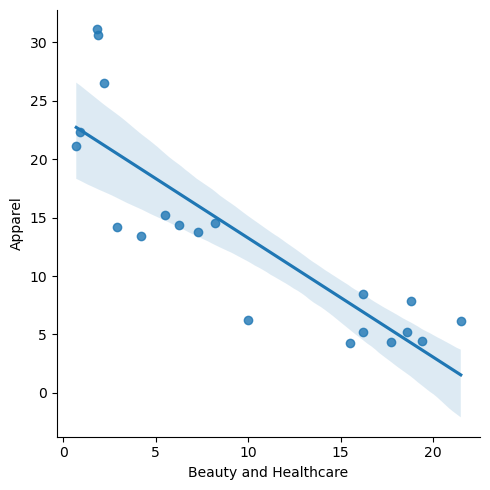

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.lmplot(x="Beauty and Healthcare",y="Apparel",data=Data);

In [32]:
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(Data)
Data["clusterid"]=clusters.labels_
Data[0:5]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Apparel,Beauty and Healthcare,clusterid
0,21.10,0.7,0
1,15.23,5.5,2
2,5.22,18.6,1
3,31.10,1.8,0
4,6.12,21.5,1


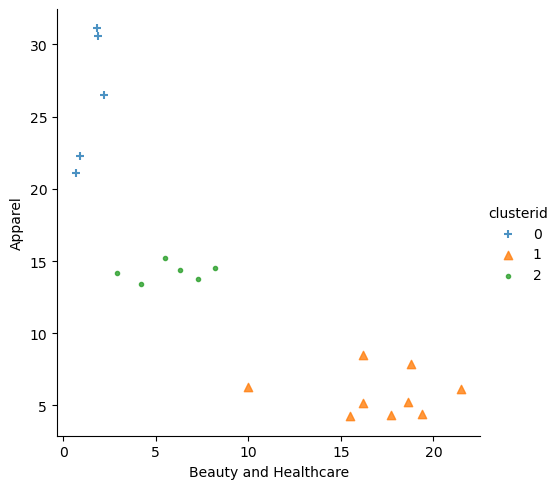

In [33]:
markers=['+','^','.']
sn.lmplot(x="Beauty and Healthcare",y="Apparel",data=Data,hue="clusterid",fit_reg=False,markers=markers)

In [36]:
#2
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(Data[["Beauty and Healthcare","Apparel"]])
scaled_df[0:5]

array([[-1.26688022,  0.892371  ],
       [-0.59775334,  0.20647107],
       [ 1.22840542, -0.96318111],
       [-1.11353864,  2.06085469],
       [ 1.63266957, -0.85801758]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


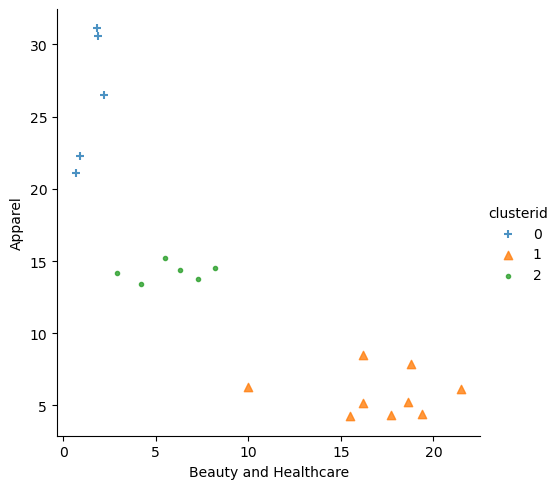

In [38]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_df)
Data["clusterid_new"] = clusters_new.labels_
markers=['+','^','.']
sn.lmplot(x="Beauty and Healthcare",y="Apparel",data=Data,hue="clusterid",fit_reg=False,markers=markers)

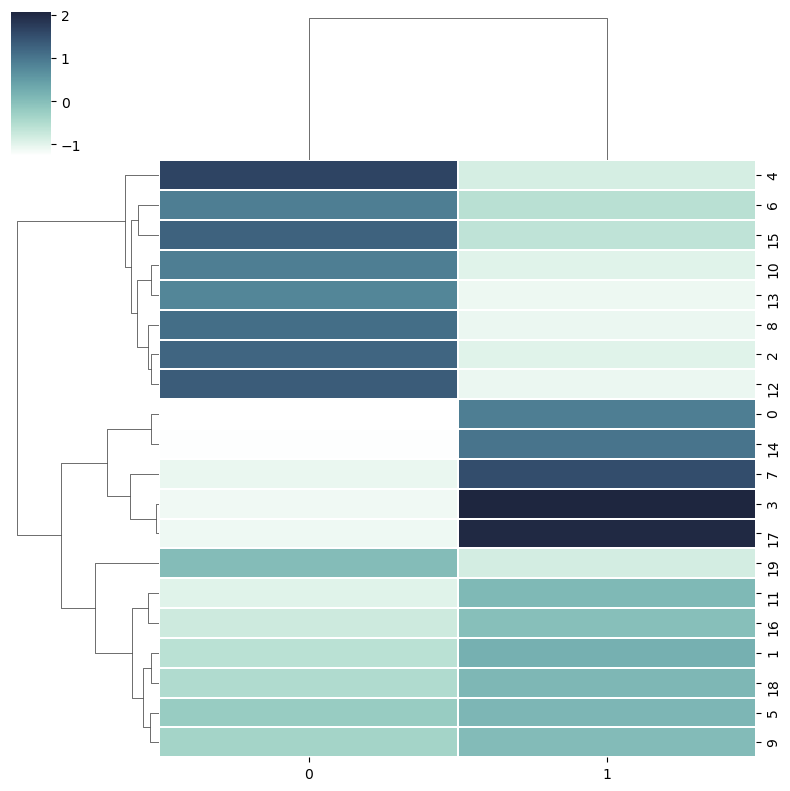

In [39]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_df, cmap=cmap, linewidths=.2,figsize = (8,8));


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

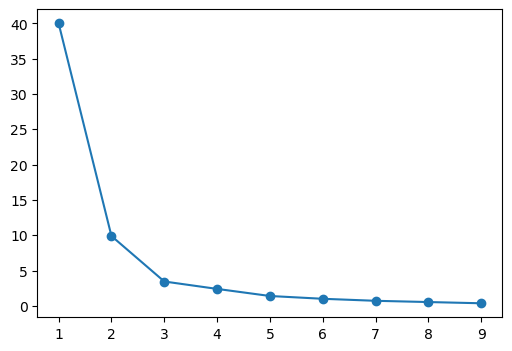

In [41]:
#3
cluster_range=range(1,10)
cluster_errors=[]
for i in cluster_range:
    clusters=KMeans(i)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker="o");

In [43]:
#4
k=3
clusters=KMeans(k,random_state=42)
clusters.fit(scaled_df)
Data["clusterid"]=clusters.labels_

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
#5
#cluster 0:
Data[Data.clusterid==0]

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
1,15.23,5.50,0,0
5,14.50,8.20,0,0
9,13.75,7.30,0,0
11,14.20,2.90,0,0
16,13.40,4.20,0,0
18,14.40,6.28,0,0
19,6.25,9.98,0,0


In [45]:
#cluster 1:
Data[Data.clusterid==1]

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
2,5.22,18.6,1,1
4,6.12,21.5,1,1
6,8.50,16.2,1,1
8,4.34,17.7,1,1
10,5.20,16.2,1,1
12,4.40,19.4,1,1
13,4.25,15.5,1,1
15,7.90,18.8,1,1


In [46]:
#cluster 2:
Data[Data.clusterid==2]

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
0,21.1,0.7,2,2
3,31.1,1.8,2,2
7,26.5,2.2,2,2
14,22.3,0.9,2,2
17,30.6,1.9,2,2


In [47]:
clusters.cluster_centers_

array([[-0.48105443, -0.04191518],
       [ 1.14302204, -0.9022739 ],
       [-1.15535907,  1.50231949]])

In [49]:
Data.groupby('clusterid')['Beauty and Healthcare','Apparel'].agg(["mean",'std']).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_14852\136634258.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data.groupby('clusterid')['Beauty and Healthcare','Apparel'].agg(["mean",'std']).reset_index()


clusterid Beauty and Healthcare              Apparel          
                             mean       std       mean       std
0         0              6.337143  2.406697  13.104286  3.077655
1         1             17.987500  2.001027   5.741250  1.646003
2         2              1.500000  0.659545  26.320000  4.599130

In [ ]:
# online Retail
import pandas as pd
online_df=pd.read_excel("Online Retail.xlsx")
online_df.info()

### online_df['InvoiceDate'] = pd.to_datetime(online_df['InvoiceDate'])

# Filter transactions between 06/01/11 and 11/30/11
start_date = '2011-06-01'
end_date = '2011-11-30'

subset_data = online_df[(online_df['InvoiceDate'] >= start_date) & (online_df['InvoiceDate'] <= end_date)]

# 'subset_data' now contains transactions that occurred between 06/01/11 and 11/30/11
print(subset_data)


In [55]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303901 entries, 209029 to 512929
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    303901 non-null  object        
 1   StockCode    303901 non-null  object        
 2   Description  303299 non-null  object        
 3   Quantity     303901 non-null  int64         
 4   InvoiceDate  303901 non-null  datetime64[ns]
 5   UnitPrice    303901 non-null  float64       
 6   CustomerID   237920 non-null  float64       
 7   Country      303901 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 20.9+ MB


In [67]:
#7
# Calculate Recency, Frequency, and Monetary Value
end_date = pd.to_datetime('2011-11-30')
recency = (end_date - subset_data.groupby('CustomerID')['InvoiceDate'].max()).dt.days 
frequency = subset_data.groupby('CustomerID')['InvoiceNo'].nunique()
monetary_value = subset_data.groupby('CustomerID')['UnitPrice'].sum()

# Create a DataFrame with RFM values
rfm_data = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'MonetaryValue': monetary_value
})

rfm_data.reset_index(inplace=True)

# Display the RFM values for each customer
print(rfm_data)

      CustomerID  Recency  Frequency  MonetaryValue
0        12347.0       29          3         242.62
1        12348.0       65          1          42.50
2        12349.0        8          1         605.10
3        12352.0       26          3         311.03
4        12356.0       12          1          23.70
...          ...      ...        ...            ...
3487     18278.0       63          1          29.55
3488     18281.0      170          1          39.36
3489     18282.0      112          2          39.16
3490     18283.0        6          9         657.66
3491     18287.0       32          2          47.63

[3492 rows x 4 columns]


In [68]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3492 non-null   float64
 1   Recency        3492 non-null   int64  
 2   Frequency      3492 non-null   int64  
 3   MonetaryValue  3492 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 109.3 KB


In [69]:
#8
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(rfm_data[["Recency","Frequency","MonetaryValue"]])
scaled_df[0:5]

array([[-0.40470772, -0.08382661,  0.00938232],
       [ 0.3597679 , -0.436292  , -0.1751826 ],
       [-0.85065184, -0.436292  ,  0.34368719],
       [-0.46841403, -0.08382661,  0.07247489],
       [-0.7657101 , -0.436292  , -0.1925213 ]])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


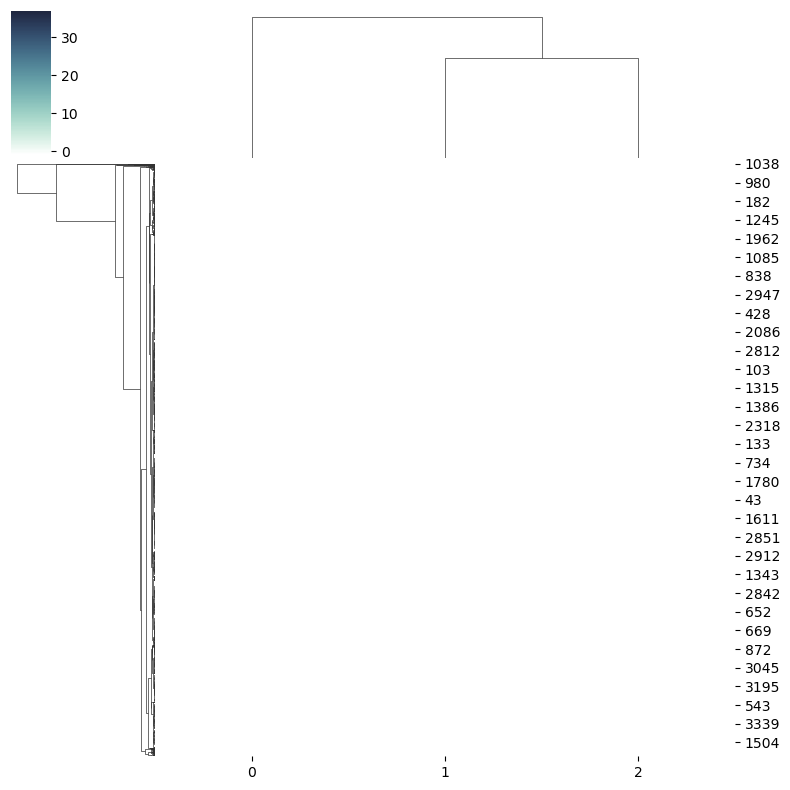

In [70]:
#8
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_df, cmap=cmap, linewidths=.2,figsize = (8,8));

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

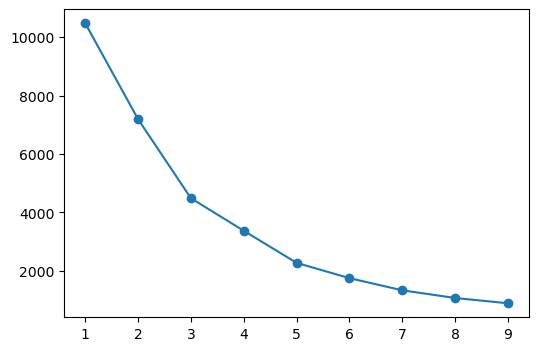

In [66]:
cluster_range=range(1,10)
cluster_errors=[]
for i in cluster_range:
    clusters=KMeans(i)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker="o");

In [80]:
#9
k=5
clusters=KMeans(k,random_state=42)
clusters.fit(scaled_df)
rfm_data["clusterid"]=clusters.labels_

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
#10
#cluster 0:
rfm_data[rfm_data.clusterid==0]

,CustomerID,Recency,Frequency,MonetaryValue,clusterid
6,0,140,1,92.63,0
10,0,99,1,16.67,0
17,0,119,1,656.44,0
21,0,174,1,49.60,0
31,0,109,2,46.61,0
...,...,...,...,...,...
3477,0,130,1,14.60,0
3480,0,124,2,25.50,0
3483,0,85,1,2.55,0
3488,0,170,1,39.36,0


In [82]:
#10
#cluster 1:
rfm_data[rfm_data.clusterid==1]

,CustomerID,Recency,Frequency,MonetaryValue,clusterid
9,1,1,9,818.19,1
40,1,14,17,1389.03,1
53,1,25,10,364.08,1
81,1,0,23,1078.73,1
83,1,19,9,2437.84,1
...,...,...,...,...,...
3439,1,21,9,192.19,1
3453,1,21,12,371.43,1
3457,1,1,12,465.51,1
3464,1,39,16,244.31,1


In [83]:
#10
#cluster 2:
rfm_data[rfm_data.clusterid==2]

,CustomerID,Recency,Frequency,MonetaryValue,clusterid
265,2,0,125,10390.48,2
1520,2,1,162,15717.74,2
3246,2,0,100,13613.19,2


In [84]:
#10
#cluster 3:
rfm_data[rfm_data.clusterid==3]

,CustomerID,Recency,Frequency,MonetaryValue,clusterid
1038,3,1,32,36294.35,3
1626,3,172,5,40278.90,3


In [85]:
#10
#cluster 4:
rfm_data[rfm_data.clusterid==4]

,CustomerID,Recency,Frequency,MonetaryValue,clusterid
0,4,29,3,242.62,4
1,4,65,1,42.50,4
2,4,8,1,605.10,4
3,4,26,3,311.03,4
4,4,12,1,23.70,4
...,...,...,...,...,...
3484,4,7,2,80.78,4
3485,4,11,3,47.25,4
3486,4,48,1,25.13,4
3487,4,63,1,29.55,4


In [86]:
clusters.cluster_centers_

array([[ 1.63328004, -0.33601768, -0.12613182],
       [-0.80240368,  1.88453712,  0.53134812],
       [-1.01345683, 22.12149327, 11.99692527],
       [ 0.81632973,  2.6477802 , 35.09627314],
       [-0.41697824, -0.13388129, -0.06304959]])

In [87]:
rfm_data.groupby('clusterid')['Recency','Frequency','MonetaryValue'].agg(["mean",'std']).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_14852\3194159252.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm_data.groupby('clusterid')['Recency','Frequency','MonetaryValue'].agg(["mean",'std']).reset_index()


clusterid     Recency               Frequency            MonetaryValue  \
                   mean         std        mean        std          mean   
0         0  124.971091   31.350173    1.568988   1.008274     95.684770   
1         1   10.287823   11.047297   14.191882   8.211560    809.443764   
2         2    0.333333    0.577350  129.000000  31.192948  13240.470000   
3         3   86.500000  120.915260   18.500000  19.091883  38286.625000   
4         4   28.413035   21.206548    2.718126   1.820035    164.250384   

                
           std  
0   232.610526  
1  1283.603399  
2  2683.116644  
3  2817.502325  
4   177.541084